In [31]:
import photonqat as pq
import numpy as np
import matplotlib.pyplot as plt

# Measurement

## Fockbase

### Photon number measurement

Measuring photon number state.  
The result is deterministic.

In [8]:
F = pq.Fock(1, cutoff = 20)
F.n_photon(0, 5).run() # prepare five photon state
res = F.photonSampling(0, ite = 10)
print(res)

[5 5 5 5 5 5 5 5 5 5]


Measuring coherent (displaced) state.  
The state is superposition of photon number states, so result is probabilistic.

$D(\alpha) = \exp(\alpha \hat{a}^{\dagger} - \alpha^{*}a^{\dagger})$

$D(\alpha) \lvert 0 \rangle = \lvert\alpha \rangle = \exp(-\lvert \alpha \rvert^2/2) \sum_n \frac{\alpha^n}{(n!)^{1/2}} \lvert n \rangle$

In [96]:
alpha = (0 + 1j) # parameter

F = pq.Fock(1, cutoff = 15)
F.D(0, alpha) # Dgate
F.run()
res = F.photonSampling(0, ite = 20)
print(res)

[1 0 1 0 1 2 1 2 1 1 1 2 0 0 0 0 0 0 2 1]


### Homodyne measurement

Measure quadrature phase $q$ (sometime refered as $x$) or $p$.

Coherent state, measure $q$

In [86]:
alpha = 1 + 0.5j
theta = 0

F = pq.Fock(2)
F.D(0, 1 + 0.5j)
F.run()
res = F.homodyneSampling(0, theta, ite = 1000)

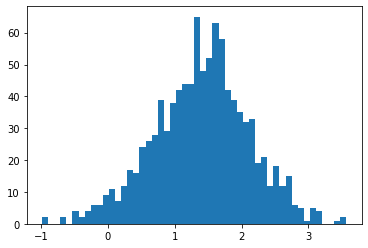

In [87]:
plt.hist(res, bins=50)
plt.show()

Coherent state, measure $p$

In [88]:
alpha = 1 + 0.5j
theta = - np.pi / 2

F = pq.Fock(2)
F.D(0, 1 + 0.5j)
F.run()
res = F.homodyneSampling(0, theta, ite = 1000)

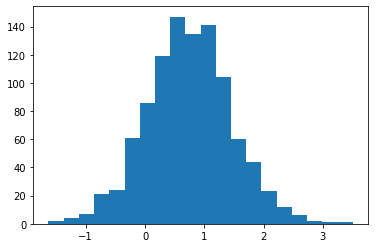

In [89]:
plt.hist(res, bins=20)
plt.show()

Cat state, measure $q$

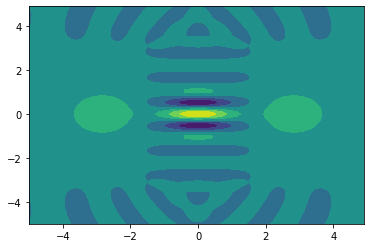

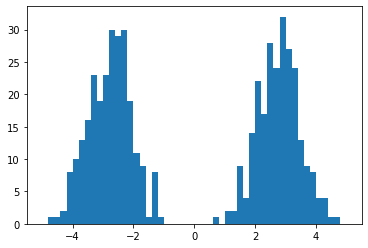

In [92]:
alpha = (1 - 0j) * 2
theta = 0
parity = 'e'

F = pq.Fock(2, cutoff = 20)
F.cat(0, alpha, parity)
F.cat(1, alpha, parity)
F.run()
res = F.homodyneSampling(0, theta, ite = 500)
x, p, W = F.Wigner(1, method = 'clenshaw') # plot
plt.hist(res, bins = 50, range = (-5, 5))
plt.show()

Coherent state, measure $p$

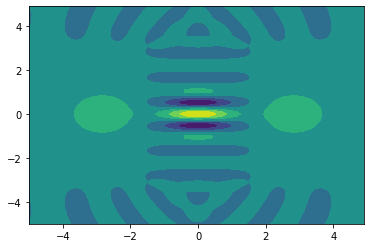

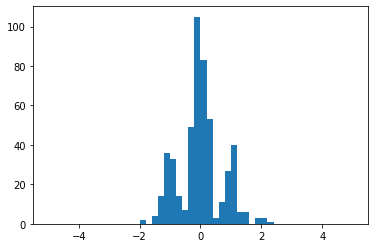

In [93]:
alpha = (1 - 0j) * 2
theta = -np.pi/2
parity = 'e'

F = pq.Fock(2, cutoff = 20)
F.cat(0, alpha, parity)
F.cat(1, alpha, parity)
F.run()
res = F.homodyneSampling(0, theta, ite = 500)
x, p, W = F.Wigner(1, method = 'clenshaw') # plot
plt.hist(res, bins = 50, range = (-5, 5))
plt.show()

## Gaussian formula

### Homodyne measurement

Measure quadrature phase $q$ (sometime refered as $x$) or $p$.

In [42]:
G = pq.Gaussian(2)

res_arr_x = []
for i in range(1000):
    G.D(0, 1 + 0.5j)
    G.MeasX(0)
    G.run()
    res = G.Creg(0, "x").read()
    res_arr_x.append(res)

The result shows Gaussian distribution sampled from Gaussian Wigner function.

(array([  3.,   3.,  11.,  17.,  39.,  53.,  84., 124., 142., 131., 136.,
        102.,  62.,  43.,  33.,  11.,   2.,   3.,   0.,   1.]),
 array([-1.77646508, -1.42944541, -1.08242575, -0.73540608, -0.38838642,
        -0.04136675,  0.30565291,  0.65267258,  0.99969224,  1.34671191,
         1.69373157,  2.04075124,  2.3877709 ,  2.73479057,  3.08181023,
         3.4288299 ,  3.77584956,  4.12286923,  4.46988889,  4.81690855,
         5.16392822]),
 <BarContainer object of 20 artists>)

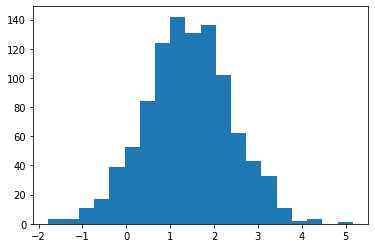

In [43]:
plt.hist(res_arr_x, bins=20)

In [44]:
G = pq.Gaussian(2)

res_arr_p = []
for i in range(1000):
    G.D(0, 1 + 0.5j)
    G.MeasP(0)
    G.run()
    res = G.Creg(0, "p").read()
    res_arr_p.append(res)

(array([  1.,   4.,   2.,  11.,  24.,  34.,  58.,  70., 109., 113., 130.,
        135.,  91.,  85.,  59.,  35.,  20.,   8.,   5.,   6.]),
 array([-2.35977370e+00, -2.06479227e+00, -1.76981083e+00, -1.47482940e+00,
        -1.17984796e+00, -8.84866530e-01, -5.89885096e-01, -2.94903661e-01,
         7.77729415e-05,  2.95059207e-01,  5.90040642e-01,  8.85022076e-01,
         1.18000351e+00,  1.47498494e+00,  1.76996638e+00,  2.06494781e+00,
         2.35992925e+00,  2.65491068e+00,  2.94989212e+00,  3.24487355e+00,
         3.53985498e+00]),
 <BarContainer object of 20 artists>)

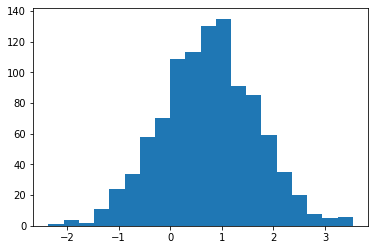

In [45]:
plt.hist(res_arr_p, bins=20)